# KNN [ K-Nearest Neighbors ] - Regression 
- K-Nearest Neighbors (KNN) is a non-parametric, supervised learning algorithm used for both classification and regression. It operates on a simple principle: similar data points exist in close proximity to each other.
- How It Works
- 1. Choose $k$ : Select the number of nearest neighbors.
  2. Calculate Distance : Find the distance between the query point and all points in the training set (typically using Euclidean distance).
  3. Identify Neighbors : Pick the $k$ closest data points.
  4. Calculate the Average : Instead of "voting," the algorithm takes the mean (average) of the target values of those $k$ neighbors.
     

## The Impact of $k$ in Regression
- Small $k$: The prediction follows the data very closely (high variance), leading to a "jagged" prediction line that may overfit to noise.
- Large $k$: The prediction becomes the average of a large part of the dataset (high bias), resulting in a "smoother" but potentially less accurate line.

## Key Differences from Classification
- Prediction Output: * Classification: Returns the Mode (most frequent class).
   - Regression: Returns the Mean (average value).
     - Note: Sometimes a weighted mean is used, where closer neighbors have more influence on the average than further ones.
- Evaluation Metrics: * Classification: Accuracy, Precision, Recall, F1-Score.
   - Regression: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or $R^2$ Score.

### Import Libraries 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

### Load Dataset 

In [19]:
data = fetch_california_housing()
X = pd.DataFrame(  data.data,  columns=data.feature_names)
X.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [20]:
y = pd.DataFrame(  data.target,  columns=["House_Price"])
y.head(4)

,House_Price
0,4.526
1,3.585
2,3.521
3,3.413


### Split X and y into Train and Test set 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape,X_test.shape

((16512, 8), (4128, 8))

### Data Scaling 

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model - KNN (Regression)

In [27]:
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

### Evaluation KNN - Regressor 

In [29]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error ::", mse)
print("R² Score           ::", r2)

Mean Squared Error :: 0.41859323965701034
R² Score           :: 0.6805629031793323


### Visualization (Actual vs Predicted)

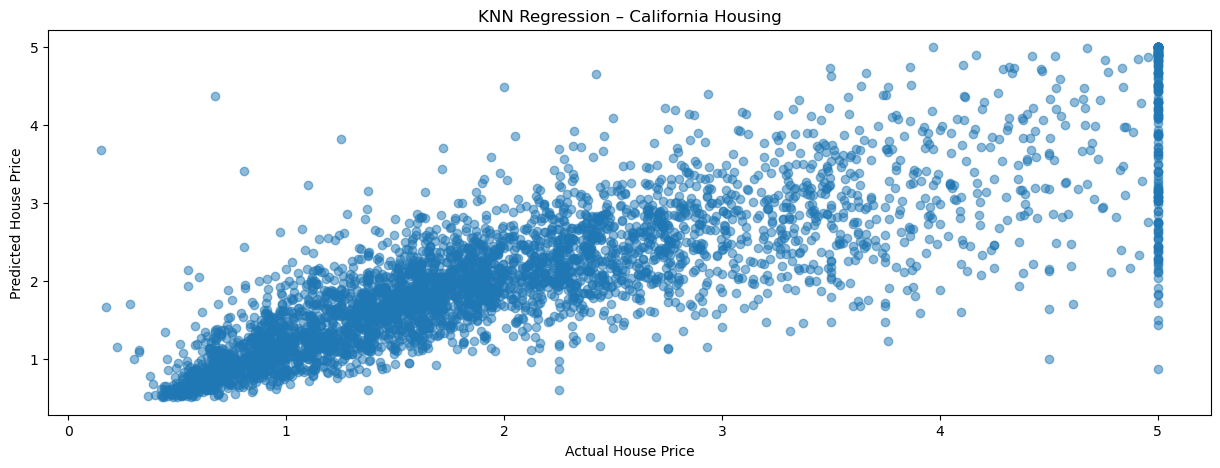

In [31]:
plt.figure(figsize=(15,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("KNN Regression – California Housing")
plt.show()

### Best value of K 

In [33]:
mse_scores = []
r2_scores = []
k_range = range(1, 21)

for i in k_range:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    print(f"k={i} | MSE: {mse:.4f} | R²: {r2:.4f}")

k=1 | MSE: 0.6690 | R²: 0.4895
k=2 | MSE: 0.5229 | R²: 0.6010
k=3 | MSE: 0.4667 | R²: 0.6439
k=4 | MSE: 0.4474 | R²: 0.6586
k=5 | MSE: 0.4324 | R²: 0.6700
k=6 | MSE: 0.4291 | R²: 0.6725
k=7 | MSE: 0.4283 | R²: 0.6731
k=8 | MSE: 0.4245 | R²: 0.6760
k=9 | MSE: 0.4246 | R²: 0.6760
k=10 | MSE: 0.4215 | R²: 0.6783
k=11 | MSE: 0.4186 | R²: 0.6806
k=12 | MSE: 0.4182 | R²: 0.6809
k=13 | MSE: 0.4163 | R²: 0.6823
k=14 | MSE: 0.4179 | R²: 0.6811
k=15 | MSE: 0.4188 | R²: 0.6804
k=16 | MSE: 0.4210 | R²: 0.6787
k=17 | MSE: 0.4211 | R²: 0.6787
k=18 | MSE: 0.4214 | R²: 0.6784
k=19 | MSE: 0.4218 | R²: 0.6781
k=20 | MSE: 0.4235 | R²: 0.6768


### Graphical Results

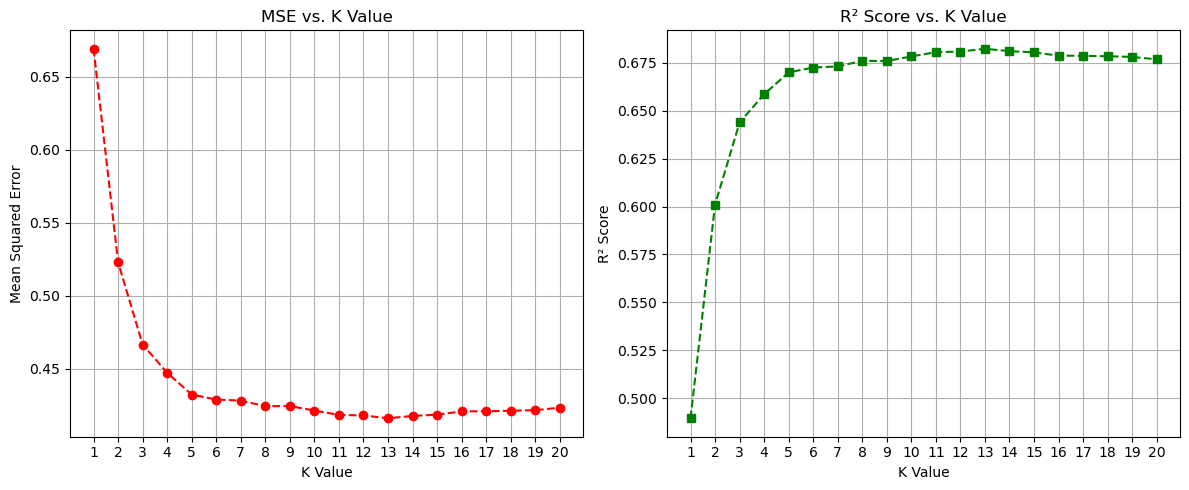

In [45]:
# Plotting the MSE (Lower is better)
plt.figure(figsize=(12, 5))

# Plot 1: Mean Squared Error
plt.subplot(1, 2, 1)
plt.plot(k_range, mse_scores, color='red', linestyle='dashed', marker='o')
plt.title('MSE vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.xticks(k_range)
plt.grid(True)

# Plot 2: R² Score
plt.subplot(1, 2, 2)
plt.plot(k_range, r2_scores, color='green', linestyle='dashed', marker='s')
plt.title('R² Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('R² Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()